Model that we are using:

*   ResNet
*   AlexNet 
*   DenseNet







download data from: https://connecthkuhk-my.sharepoint.com/:f:/g/personal/u3570905_connect_hku_hk/ElCVhm-hAs5Dtu3uL4jp8KUBOWmh9hfJ6uqWGRb5PDfvbg?e=XO79yu
and place it in the same folder as the .ipynb file



In [ ]:
# !wget https://github.com/ngjames/file/releases/download/17flowers/17flowers_labeled.zip
# !unzip 17flowers_labeled

--2024-04-24 17:47:18--  https://github.com/ngjames/file/releases/download/17flowers/17flowers_labeled.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-24 17:47:18 ERROR 404: Not Found.

/bin/bash: line 1: unzip: command not found


In [3]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir("17flowers")

There are 17 directories and 1 images in '17flowers'.
There are 0 directories and 80 images in '17flowers/class_14'.
There are 0 directories and 80 images in '17flowers/class_11'.
There are 0 directories and 80 images in '17flowers/class_10'.
There are 0 directories and 80 images in '17flowers/class_16'.
There are 0 directories and 80 images in '17flowers/class_4'.
There are 0 directories and 80 images in '17flowers/class_9'.
There are 0 directories and 80 images in '17flowers/class_1'.
There are 0 directories and 80 images in '17flowers/class_3'.
There are 0 directories and 80 images in '17flowers/class_2'.
There are 0 directories and 80 images in '17flowers/class_0'.
There are 0 directories and 80 images in '17flowers/class_6'.
There are 0 directories and 80 images in '17flowers/class_5'.
There are 0 directories and 80 images in '17flowers/class_12'.
There are 0 directories and 80 images in '17flowers/class_8'.
There are 0 directories and 80 images in '17flowers/class_7'.
There are 0

In [4]:
!conda install -n python_env ipykernel

/bin/bash: line 1: conda: command not found


In [5]:
!conda install pytorch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 cudatoolkit=10.1 -c pytorch -y

/bin/bash: line 1: conda: command not found


In [6]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
!pip install split-folders

import splitfolders

splitfolders.ratio("17flowers", # The location of dataset
                   output="train_data", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 1360 files [00:00, 3717.69 files/s]


In [8]:
image_path = "/content/train_data"
# Setup train and testing paths
train_dir = image_path + "/train"
test_dir = image_path + "/test"
val_dir = image_path + "/val"

train_dir, test_dir, val_dir

('/content/train_data/train',
 '/content/train_data/test',
 '/content/train_data/val')

In [9]:
import torch
import torchvision
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import os

In [10]:
print(torch.cuda.is_available())

True


In [11]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(227, 227)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 952
    Root location: /content/train_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 136
    Root location: /content/train_data/test
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
class Net(nn.Module):
    """
    Input - 3x128x128
    Output - 10
    """
    def __init__(self):
        super().__init__()
        #TODO: please change the network to match with the model that you are training
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, 17)) #4096, no of class

    def forward(self, xb):
        out = self.layer1(xb)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [13]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [14]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 17):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:

            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)


    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

**Load** Data

In [15]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=10, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=10,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ecedde52230>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecedde510f0>)

Start Trainning

In [16]:
classes = train_data.classes

In [18]:

train_size = 952


def train_test(model, criterion, optimizer, scheduler, num_epochs=25,dropoutProb=0.1):
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    history = dict()
    validation_accuracy=[]
    model.train()
    for epoch in range(num_epochs):
        running_training_loss = 0.0
        running_training_accuracy = 0.0
        iteration_training_loss = 0.0
        total_training_predictions = 0

        start_time = time.time()
        for i, data in enumerate(train_dataloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            # dropout = torch.nn.Dropout(p=dropoutProb)
            # inputs = dropout(inputs)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_training_loss += loss.item()*inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total_training_predictions += labels.size(0)
            running_training_accuracy += (predicted == labels).sum().item()
            iteration_training_loss += loss.item()
            if (i+1) % 100 == 0:
                print('Epoch:[%d]-Iteration:[%d], training loss: %.3f' %
                      (epoch + 1,i+1,iteration_training_loss/(i+1)))
        end_time = time.time()
        print('Time cost of one epoch: [%d]s' % (end_time-start_time))

        epoch_training_accuracy = running_training_accuracy / train_size*100
        epoch_training_loss = running_training_loss / train_size

        print('Epoch:[%d], training accuracy: %.1f, training loss: %.3f' %
              (epoch + 1,epoch_training_accuracy, epoch_training_loss))

        train_loss.append(epoch_training_loss)
        train_accuracy.append(epoch_training_accuracy)

        history['train_loss'] = train_loss
        history['train_accuracy'] = train_accuracy

        correct = 0
        total = 0
        model.eval()

        #prepare to count predictions for each class
        correct_pred = {classname: 0 for classname in classes}
        total_pred = {classname: 0 for classname in classes}
        test_accuracy = {classname: 0 for classname in classes}

        # again no gradients needed
        with torch.no_grad():
            for data in test_dataloader:
                images, labels = data
                images, labels = images.cuda(), labels.cuda()
                outputs = model_ft(images)
                _, predictions = torch.max(outputs, 1)
                # collect the correct predictions for each class
                for label, prediction in zip(labels, predictions):
                    if label == prediction:
                        correct_pred[classes[label]] += 1
                    total_pred[classes[label]] += 1

        # print accuracy for each class
        for classname, correct_count in correct_pred.items():
            accuracy = 100 * float(correct_count) / total_pred[classname]
            # print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
            test_accuracy[classname] = accuracy / 100
        print("Average verification accuracy:" +str(sum(test_accuracy.values())/17))
        validation_accuracy.append(sum(test_accuracy.values())/17)
        model.train()

        scheduler.step()

    print('Finished Training')

    history['train_loss'] = train_loss
    history['train_accuracy'] = train_accuracy
    history["validation_accuracy"]=validation_accuracy


    # correct = 0
    # total = 0
    # model.eval()

    # # prepare to count predictions for each class
    # correct_pred = {classname: 0 for classname in classes}
    # total_pred = {classname: 0 for classname in classes}
    # test_accuracy = {classname: 0 for classname in classes}

    # # again no gradients needed
    # with torch.no_grad():
    #     for data in test_dataloader:
    #         images, labels = data
    #         images, labels = images.cuda(), labels.cuda()
    #         outputs = model_ft(images)
    #         _, predictions = torch.max(outputs, 1)
    #         # collect the correct predictions for each class
    #         for label, prediction in zip(labels, predictions):
    #             if label == prediction:
    #                 correct_pred[classes[label]] += 1
    #             total_pred[classes[label]] += 1

    # # print accuracy for each class
    # for classname, correct_count in correct_pred.items():
    #     accuracy = 100 * float(correct_count) / total_pred[classname]
    #     print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
    #     test_accuracy[classname] = accuracy / 100


    return history, test_accuracy

Tunning of hyper-parameters

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Time cost of one epoch: [7]s
Epoch:[1], training accuracy: 9.9, training loss: 3.513
Average verification accuracy:0.15441176470588236
Time cost of one epoch: [7]s
Epoch:[2], training accuracy: 14.6, training loss: 2.520
Average verification accuracy:0.19117647058823528
Time cost of one epoch: [7]s
Epoch:[3], training accuracy: 14.1, training loss: 2.514
Average verification accuracy:0.16176470588235295
Time cost of one epoch: [6]s
Epoch:[4], training accuracy: 13.9, training loss: 2.503
Average verification accuracy:0.18382352941176472
Time cost of one epoch: [7]s
Epoch:[5], training accuracy: 17.2, training loss: 2.383
Average verification accuracy:0.16911764705882354
Time cost of one epoch: [7]s
Epoch:[6], training accuracy: 17.9, training loss: 2.331
Average verification accuracy:0.21323529411764705
Time cost of one epoch: [7]s
Epoch:[7], training accuracy: 16.6, training loss: 2.251
Average verification accuracy:0.19852941176470587
Time cost of one epoch: [7]s
Epoch:[8], training 

AttributeError: Line2D.set() got an unexpected keyword argument 'lebel'

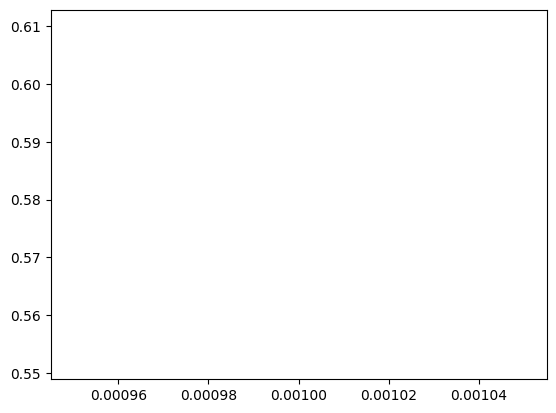

In [19]:
import torch
import matplotlib.pyplot as plt

if __name__ == '__main__':
    end = time.time()
    model_ft = Net().to(device) # Model initialization    #print(model_ft.network)
    criterion = nn.CrossEntropyLoss() # Loss function initialization

    lr_list=[1e-3]
    test_acc_list=[]
    validation_acc_list=[]


    for i in lr_list:

      # TODO: Adjust the following hyper-parameters: initial learning rate, decay strategy of the learning rate, number of training epochs
      optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=i) # The initial learning rate is 1e-3

      exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=2.5, gamma=0.5) # Decay strategy of the learning rate


      history, accuracy = train_test(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50)# The number of training epochs is 25
      test_acc_list.append(history['train_accuracy'][-1]/100)
      validation_acc_list.append((sum(accuracy.values())/17))

      print("time required %.2fs"%(time.time() - end))
      print("Average verification accuracy %.2fpercent"%(sum(accuracy.values())/17))
      print("test_accuracy_epochs"+str(history['train_accuracy']))
      print("validation_accuracy_list"+str(history["validation_accuracy"]))

    plt.plot(lr_list, test_acc_list,label="Test accuracy")
    plt.plot(lr_list,test_acc_list,lebel="Average verification accuracy")
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    print("test_acc_list"+str(test_acc_list))
    print("verification accuracy"+str(validation_acc_list))



# Densenet Model

In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import Tensor
import time
import os

In [21]:
class _Transition(nn.Sequential):
  def __init__(self, num_input_features, num_output_features):
    super(_Transition, self).__init__()
    self.add_module("norm", nn.BatchNorm2d(num_input_features))
    self.add_module("relu", nn.ReLU(inplace=True))
    self.add_module("conv", nn.Conv2d(num_input_features, num_output_features, kernel_size=1, stride=1, bias=False))
    self.add_module("pool", nn.AvgPool2d(kernel_size=2, stride=2))

In [22]:
class _DenseLayer(nn.Module):
  def __init__(self, num_input_features, growth_rate, bn_size, drop_rate, memory_efficient=False):
    super(_DenseLayer, self).__init__()
    self.add_module("norm1", nn.BatchNorm2d(num_input_features))
    self.add_module('relu1', nn.ReLU(inplace=True))
    self.add_module('conv1', nn.Conv2d(num_input_features, bn_size * growth_rate, kernel_size=1, stride=1, bias=False))
    self.add_module('norm2', nn.BatchNorm2d(bn_size * growth_rate))
    self.add_module('relu2', nn.ReLU(inplace=True))
    self.add_module('conv2', nn.Conv2d(bn_size * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False))
    self.drop_rate = float(drop_rate)
    self.memory_efficient = memory_efficient

  def bn_function(self, inputs):
    "Bottleneck function"
    # type: (List[Tensor]) -> Tensor
    concated_features = torch.cat(inputs, 1)
    bottleneck_output = self.conv1(self.relu1(self.norm1(concated_features)))  # noqa: T484
    return bottleneck_output

  def forward(self, input):  # noqa: F811
    if isinstance(input, Tensor):
      prev_features = [input]
    else:
      prev_features = input
    bottleneck_output = self.bn_function(prev_features)
    new_features = self.conv2(self.relu2(self.norm2(bottleneck_output)))
    if self.drop_rate > 0:
      new_features = F.dropout(new_features, p=self.drop_rate, training=self.training)
    return new_features





In [23]:
class _DenseBlock(nn.ModuleDict):
  _version = 2
  def __init__(self, num_layers, num_input_features, bn_size, growth_rate, drop_rate, memory_efficient=False):
    super(_DenseBlock, self).__init__()
    for i in range(num_layers):
      layer = _DenseLayer(
        num_input_features + i * growth_rate,
        growth_rate=growth_rate,
        bn_size=bn_size,
        drop_rate=drop_rate,
        memory_efficient=memory_efficient,
      )
      self.add_module('denselayer%d' % (i + 1), layer)
  def forward(self, init_features):
    features = [init_features]
    for name, layer in self.items():
        new_features = layer(features)
        features.append(new_features)
    return torch.cat(features, 1)

In [24]:
from collections import OrderedDict
class DenseNet(nn.Module):
  # hyperpar=growth_rateameters:
    # Dense Block #layers = choose how many layers within denseblock
    # Growth rate = #features outputed by each layer
    # Bottleneck size = #features to reduce past layers to before current(bn_size*growth rate) layer conv
    # drop rate
  def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16), num_init_features=64, bn_size=4, drop_rate=0, num_classes=1000, memory_efficient=False):
    super(DenseNet, self).__init__()
    # Initial Conv, Pool - input 224x224x3, output 56x56x64
    self.features = nn.Sequential(OrderedDict([
      ('conv0', nn.Conv2d(3, num_init_features, kernel_size=7, stride=2,
                          padding=3, bias=False)),
      ('norm0', nn.BatchNorm2d(num_init_features)),
      ('relu0', nn.ReLU(inplace=True)),
      ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
    ]))

    # growth_rate=8, bn_size=4*growth_rate, drop_rate=0
    bn_size = 4
    growth_rate = 8
    drop_rate = 0

    # Dense Block 1 - input 56x56x64, output 56x56x(64+g*#layers) = 112
    self.features.add_module("denseblock1", _DenseBlock(num_layers=6, num_input_features=64, bn_size=bn_size, growth_rate=growth_rate, drop_rate=drop_rate, memory_efficient=False))
    # Transition Layer 1 - output 28x28,((64+g*#layers)/2) = 56
    self.features.add_module("transition1", _Transition(num_input_features=112, num_output_features=56))

    # Dense Block 2 - input 28x28x(prev_output), output 28x28x(prev_output+g*#layers) = 152
    self.features.add_module("denseblock2", _DenseBlock(num_layers=12, num_input_features=56, bn_size=bn_size, growth_rate=growth_rate, drop_rate=drop_rate, memory_efficient=False))
    # Transition Layer 2 - output 14x14x? = 76
    self.features.add_module("transition2", _Transition(num_input_features=152, num_output_features=76))

    # Dense Block 3 - input 14x14x?, output, 14x14x? = 268
    self.features.add_module("denseblock3", _DenseBlock(num_layers=24, num_input_features=76, bn_size=bn_size, growth_rate=growth_rate, drop_rate=drop_rate, memory_efficient=False))
    # Transition Layer 3 - output 7x7x? = 134
    self.features.add_module("transition3", _Transition(num_input_features=268, num_output_features=134))

    # Dense Block 4 - input 7x7x?, output 7x7x? = 262
    self.features.add_module("denseblock4", _DenseBlock(num_layers=16, num_input_features=134, bn_size=bn_size, growth_rate=growth_rate, drop_rate=drop_rate, memory_efficient=False))

    # Final Batch Norm
    self.features.add_module('norm5', nn.BatchNorm2d(262)) #262 = num features outputed from last denseblock
    # Linear Classifer
    self.classifier = nn.Linear(262, 17) #num class is the 17 categories of plant
    # Softmax

    # Official init from torch repo.
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
          nn.init.kaiming_normal_(m.weight)
      elif isinstance(m, nn.BatchNorm2d):
          nn.init.constant_(m.weight, 1)
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
          nn.init.constant_(m.bias, 0)

  def forward(self, x):
    features = self.features(x)
    out = F.relu(features, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1, 1))
    out = torch.flatten(out, 1)
    out = self.classifier(out)
    return out



In [25]:
class ExampleDenseNet(nn.Module): # https://amaarora.github.io/2020/08/02/densenets.html
  def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16),
                 num_init_features=64, bn_size=4, drop_rate=0, num_classes=1000, memory_efficient=False):

    super(DenseNet, self).__init__()

    # Convolution and pooling part from table-1
    self.features = nn.Sequential(OrderedDict([
      ('conv0', nn.Conv2d(3, num_init_features, kernel_size=7, stride=2,
                          padding=3, bias=False)),
      ('norm0', nn.BatchNorm2d(num_init_features)),
      ('relu0', nn.ReLU(inplace=True)),
      ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
    ]))

    # Add multiple denseblocks based on config
    # for densenet-121 config: [6,12,24,16]
    num_features = num_init_features
    for i, num_layers in enumerate(block_config):
      block = _DenseBlock(
        num_layers=num_layers,
        num_input_features=num_features,
        bn_size=bn_size,
        growth_rate=growth_rate,
        drop_rate=drop_rate,
        memory_efficient=memory_efficient
      )
      self.features.add_module('denseblock%d' % (i + 1), block)
      num_features = num_features + num_layers * growth_rate
      if i != len(block_config) - 1:
        # add transition layer between denseblocks to
        # downsample
        trans = _Transition(num_input_features=num_features,
                            num_output_features=num_features // 2)
        self.features.add_module('transition%d' % (i + 1), trans)
        num_features = num_features // 2

    # Final batch norm
    self.features.add_module('norm5', nn.BatchNorm2d(num_features))

    # Linear layer
    self.classifier = nn.Linear(num_features, num_classes)

    # Official init from torch repo.
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
          nn.init.kaiming_normal_(m.weight)
      elif isinstance(m, nn.BatchNorm2d):
          nn.init.constant_(m.weight, 1)
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
          nn.init.constant_(m.bias, 0)

  def forward(self, x):
    features = self.features(x)
    out = F.relu(features, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1, 1))
    out = torch.flatten(out, 1)
    out = self.classifier(out)
    return out

# Load Data

In [26]:
print(torch.cuda.is_available())
device = "cuda" if torch.cuda.is_available() else "cpu"

True


In [27]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nEval data:\n{val_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 952
    Root location: /content/train_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Eval data:
Dataset ImageFolder
    Number of datapoints: 272
    Root location: /content/train_data/val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 136
    Root location: /content/train_data/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [28]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=10, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=10,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

val_dataloader = DataLoader(dataset=val_data, batch_size=10, num_workers=1, shuffle=False)


train_dataloader, test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7eceddadc790>,
 <torch.utils.data.dataloader.DataLoader at 0x7eceddcb2740>)

# Train Model

In [29]:
classes = train_data.classes
train_size = 952
def train_test(model, criterion, optimizer, scheduler, num_epochs):
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    history = dict()
    model.train()
    for epoch in range(num_epochs):
        running_training_loss = 0.0
        running_training_accuracy = 0.0
        iteration_training_loss = 0.0
        total_training_predictions = 0

        start_time = time.time()
        for i, data in enumerate(train_dataloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_training_loss += loss.item()*inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total_training_predictions += labels.size(0)
            running_training_accuracy += (predicted == labels).sum().item()
            iteration_training_loss += loss.item()
            # if (i+1) % 100 == 0:
            #     print('Epoch:[%d]-Iteration:[%d], training loss: %.3f' %
            #           (epoch + 1,i+1,iteration_training_loss/(i+1)))

        # Evaluate model after epoch
        #TODO - add evaluation step to produce graph


        end_time = time.time()
        print('Time cost of one epoch: [%d]s' % (end_time-start_time))

        epoch_training_accuracy = running_training_accuracy / train_size*100
        # print("eooch training accuracy", epoch_training_accuracy)
        # print("running training accuracy", running_training_accuracy)
        # print("train size", train_size)
        epoch_training_loss = running_training_loss / train_size

        print('Epoch:[%d], training accuracy: %.1f, training loss: %.3f' %
              (epoch + 1,epoch_training_accuracy, epoch_training_loss))

        train_loss.append(epoch_training_loss)
        train_accuracy.append(epoch_training_accuracy)

        scheduler.step()

    print('Finished Training')

    history['train_loss'] = train_loss
    history['train_accuracy'] = train_accuracy

    correct = 0
    total = 0
    model.eval()

    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    test_accuracy = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in test_dataloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = model_ft(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
        test_accuracy[classname] = accuracy / 100

    return history, test_accuracy

In [30]:
train_size = 952


def train_test(model, criterion, optimizer, scheduler, num_epochs=25):
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    history = dict()
    validation_accuracy=[]
    model.train()
    for epoch in range(num_epochs):
        running_training_loss = 0.0
        running_training_accuracy = 0.0
        iteration_training_loss = 0.0
        total_training_predictions = 0

        start_time = time.time()
        for i, data in enumerate(train_dataloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_training_loss += loss.item()*inputs.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total_training_predictions += labels.size(0)
            running_training_accuracy += (predicted == labels).sum().item()
            iteration_training_loss += loss.item()
            if (i+1) % 100 == 0:
                print('Epoch:[%d]-Iteration:[%d], training loss: %.3f' %
                      (epoch + 1,i+1,iteration_training_loss/(i+1)))
        end_time = time.time()
        print('Time cost of one epoch: [%d]s' % (end_time-start_time))

        epoch_training_accuracy = running_training_accuracy / train_size*100
        epoch_training_loss = running_training_loss / train_size

        print('Epoch:[%d], training accuracy: %.1f, training loss: %.3f' %
              (epoch + 1,epoch_training_accuracy, epoch_training_loss))

        train_loss.append(epoch_training_loss)
        train_accuracy.append(epoch_training_accuracy)

        history['train_loss'] = train_loss
        history['train_accuracy'] = train_accuracy

        correct = 0
        total = 0
        model.eval()

        #prepare to count predictions for each class
        correct_pred = {classname: 0 for classname in classes}
        total_pred = {classname: 0 for classname in classes}
        test_accuracy = {classname: 0 for classname in classes}

        # again no gradients needed
        with torch.no_grad():
            for data in test_dataloader:
                images, labels = data
                images, labels = images.cuda(), labels.cuda()
                outputs = model_ft(images)
                _, predictions = torch.max(outputs, 1)
                # collect the correct predictions for each class
                for label, prediction in zip(labels, predictions):
                    if label == prediction:
                        correct_pred[classes[label]] += 1
                    total_pred[classes[label]] += 1

        # print accuracy for each class
        for classname, correct_count in correct_pred.items():
            accuracy = 100 * float(correct_count) / total_pred[classname]
            print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
            test_accuracy[classname] = accuracy / 100
        print("Average verification accuracy:" +str(sum(test_accuracy.values())/17))
        validation_accuracy.append(sum(test_accuracy.values())/17)
        model.train()

        scheduler.step()

    print('Finished Training')

    history['train_loss'] = train_loss
    history['train_accuracy'] = train_accuracy
    history["validation_accuracy"]=validation_accuracy

    return history, test_accuracy

In [31]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [32]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 17):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:

            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)


    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [33]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

if __name__ == '__main__':
    end = time.time()
    model_ft = ResNet(ResidualBlock, [3, 4, 6, 3]).to(device) # Model initialization
    # print(model_ft.network)
    criterion = nn.CrossEntropyLoss() # Loss function initialization

    # TODO: Adjust the following hyper-parameters: initial learning rate, decay strategy of the learning rate, number of training epochs
    optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.01) # The initial learning rate is 1e-3

    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.5) # Decay strategy of the learning rate


    history, accuracy = train_test(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25) # The number of training epochs is 25

    print("time required %.2fs" %(time.time() - end))
    print("Average verification accuracy %.2fpercent"%(sum(accuracy.values())/17*100))

Time cost of one epoch: [8]s
Epoch:[1], training accuracy: 8.0, training loss: 3.363
Accuracy for class class_0 is: 0.0 %
Accuracy for class class_1 is: 0.0 %
Accuracy for class class_10 is: 62.5 %
Accuracy for class class_11 is: 0.0 %
Accuracy for class class_12 is: 0.0 %
Accuracy for class class_13 is: 87.5 %
Accuracy for class class_14 is: 0.0 %
Accuracy for class class_15 is: 0.0 %
Accuracy for class class_16 is: 0.0 %
Accuracy for class class_2 is: 0.0 %
Accuracy for class class_3 is: 0.0 %
Accuracy for class class_4 is: 0.0 %
Accuracy for class class_5 is: 0.0 %
Accuracy for class class_6 is: 0.0 %
Accuracy for class class_7 is: 0.0 %
Accuracy for class class_8 is: 0.0 %
Accuracy for class class_9 is: 0.0 %
Average verification accuracy:0.08823529411764706
Time cost of one epoch: [8]s
Epoch:[2], training accuracy: 8.7, training loss: 2.753
Accuracy for class class_0 is: 0.0 %
Accuracy for class class_1 is: 12.5 %
Accuracy for class class_10 is: 12.5 %
Accuracy for class class_11 

Time cost of one epoch: [12]s
Epoch:[1], training accuracy: 26.4, training loss: 2.289
Accuracy for class class_0 is: 0.0 %
Accuracy for class class_1 is: 12.5 %
Accuracy for class class_10 is: 37.5 %
Accuracy for class class_11 is: 12.5 %
Accuracy for class class_12 is: 37.5 %
Accuracy for class class_13 is: 25.0 %
Accuracy for class class_14 is: 25.0 %
Accuracy for class class_15 is: 62.5 %
Accuracy for class class_16 is: 62.5 %
Accuracy for class class_2 is: 50.0 %
Accuracy for class class_3 is: 0.0 %
Accuracy for class class_4 is: 25.0 %
Accuracy for class class_5 is: 12.5 %
Accuracy for class class_6 is: 87.5 %
Accuracy for class class_7 is: 37.5 %
Accuracy for class class_8 is: 12.5 %
Accuracy for class class_9 is: 87.5 %
Average verification accuracy:0.34558823529411764
Time cost of one epoch: [11]s
Epoch:[2], training accuracy: 40.5, training loss: 1.879
Accuracy for class class_0 is: 0.0 %
Accuracy for class class_1 is: 50.0 %
Accuracy for class class_10 is: 50.0 %
Accuracy fo

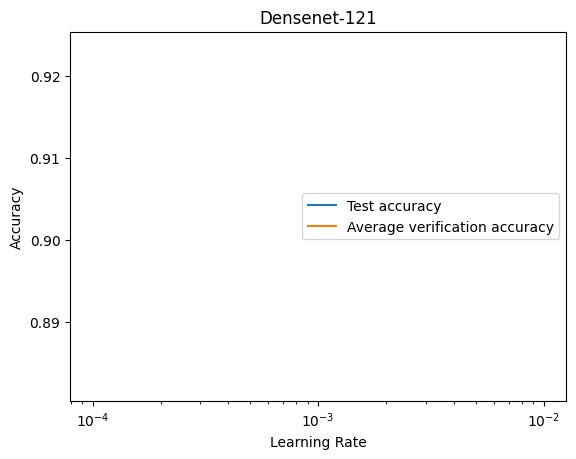

test_acc_list[0.9233193277310925]
verification accuracy[0.8823529411764706]


In [34]:
import torch
import matplotlib.pyplot as plt

if __name__ == '__main__':
    end = time.time()
    model_ft = DenseNet().to(device) # Model initialization
    #print(model_ft.network)
    criterion = nn.CrossEntropyLoss() # Loss function initialization

    lr_list=[1e-3]
    test_acc_list=[]
    validation_acc_list=[]
    validation_acc_category_list = []


    for i in lr_list:

      # TODO: Adjust the following hyper-parameters: initial learning rate, decay strategy of the learning rate, number of training epochs
      optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=i) # The initial learning rate is 1e-3

      exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=2.5, gamma=0.5) # Decay strategy of the learning rate


      history, accuracy = train_test(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=60)# The number of training epochs is 25
      test_acc_list.append(history['train_accuracy'][-1]/100)
      validation_acc_list.append((sum(accuracy.values())/17))
      validation_acc_category_list = accuracy

      print("Learning rate", i)
      print("time required %.2fs"%(time.time() - end))
      print("Average verification accuracy %.2fpercent"%(sum(accuracy.values())/17))
      print("test_accuracy_epochs"+str(history['train_accuracy']))
      print("\n\n\n")

plt.plot(lr_list, test_acc_list,label="Test accuracy")
plt.plot(lr_list,validation_acc_list,label="Average verification accuracy")
plt.title("Densenet-121")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.legend()
plt.show()
print("test_acc_list"+str(test_acc_list))
print("verification accuracy"+str(validation_acc_list))